In [39]:
import random, math
import pandas as pd
import numpy as np
import scipy.io

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib

from sklearn.decomposition import PCA
from sklearn import manifold

# If you'd like to try this lab with PCA instead of Isomap as the dimensionality reduction technique:
Test_PCA = False

matplotlib.style.use('ggplot') # Look Pretty


def Plot2DBoundary(DTrain, LTrain, DTest, LTest):
  # The dots are training samples (img not drawn), and the pics are testing samples (images drawn)
  # Play around with the K values. This is very controlled dataset so it should be able to get perfect classification on testing entries
  # Play with the K for isomap, play with the K for neighbors. 

  fig = plt.figure(figsize = (12, 12))
  ax = fig.add_subplot(111)
  ax.set_title('Transformed Boundary, Image Space -> 2D')

  padding = 0.1   # Zoom out
  resolution = 3  # Don't get too detailed; smaller values (finer rez) will take longer to compute

  mesh_colors = ListedColormap(['#1e5ec4', '#41d973', '#ded587', '#e1d9d7'])
  plot_colors = ['blue','green','orange','red']

  # ------

  # Calculate the boundaries of the mesh grid. The mesh grid is a standard grid (think graph paper), where each point will be
  # sent to the classifier (KNeighbors) to predict what class it belongs to. This is why KNeighbors has to be trained against
  # 2D data, so we can produce this contour. Once we have the label for each point on the grid, we can color it appropriately
  # and plot it.
  x_min, x_max = DTrain[:, 0].min(), DTrain[:, 0].max()
  y_min, y_max = DTrain[:, 1].min(), DTrain[:, 1].max()
  x_range = x_max - x_min
  y_range = y_max - y_min
  x_min -= x_range * padding
  y_min -= y_range * padding
  x_max += x_range * padding
  y_max += y_range * padding

  # Using the boundaries, actually make the 2D Grid Matrix:
  xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                       np.arange(y_min, y_max, resolution))

  # What class does the classifier say about each spot on the chart?
  # The values stored in the matrix are the predictions of the model at said location:
  Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Plot the mesh grid as a filled contour plot:
  plt.contourf(xx, yy, Z, cmap=mesh_colors, z=-100)
  plt.axis('tight')

  # ------

  # When plotting the testing images, used to validate if the algorithm is functioning correctly, size them as 5% of the overall
  # chart size
  x_size = x_range * 0.05
  y_size = y_range * 0.05
  
  # First, plot the images in your TEST dataset
  img_num = 0
  for index in LTest.index:
    # DTest is a regular NDArray, so you'll iterate over that 1 at a time.
    x0, y0 = DTest[img_num,0]-x_size/2., DTest[img_num,1]-y_size/2.
    x1, y1 = DTest[img_num,0]+x_size/2., DTest[img_num,1]+y_size/2.

    # DTest = our images isomap-transformed into 2D. But we still want to plot the original image, so we look to the original,
    # untouched dataset (at index) to get the pixels:
    img = df.iloc[index,:].reshape(num_pixels, num_pixels)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1), alpha=0.8)
    img_num += 1


  # Plot your TRAINING points as well... as points rather than as images
  for label in range(len(np.unique(LTrain))):
    indices = np.where(LTrain == label)
    ax.scatter(DTrain[indices, 0], DTrain[indices, 1], c=plot_colors[label], alpha=0.8, marker='o', s = 29)

  # Plot
  plt.show()

In [29]:
mat = scipy.io.loadmat('face_data.mat')
mat

df = pd.DataFrame(mat['images']).T
df
num_images, num_pixels = df.shape
num_pixels = int(math.sqrt(num_pixels))
num_pixels

64

In [17]:
# Rotate the image, so we don't have to crane our necks:
for i in range(num_images):
    df.loc[i,:] = df.loc[i,:].reshape(num_pixels, num_pixels).T.reshape(-1)
    


/Users/zhihuanwilson/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
label = pd.read_csv('face_labels.csv')
label
label = label.iloc[:, 0]
type(label)
label.head()
print "Length of label series is: ", len(label)
print "Length of data frame is: ", len(df)
# Lengths of the dataframe(df) and the label series do not match - 698 and 697, respectively.
# Let's remove the first row of df.
print df.head()
df.drop(df.index[:1], inplace = True)

Length of label series is:  697
Length of data frame is:  698
       0         1         2         3         4         5         6     \
0  0.016176  0.016176  0.016176  0.016176  0.016176  0.016176  0.016176   
1  0.016176  0.016176  0.016176  0.016176  0.016988  0.028140  0.047518   
2  0.016176  0.016176  0.016176  0.016176  0.016176  0.016176  0.016176   
3  0.016176  0.016176  0.016176  0.024188  0.039859  0.040671  0.038710   
4  0.016176  0.016176  0.016176  0.016176  0.016176  0.016176  0.016176   

       7         8         9     ...   4086  4087  4088  4089  4090  4091  \
0  0.016176  0.016176  0.016176  ...    0.0   0.0   0.0   0.0   0.0   0.0   
1  0.050950  0.080469  0.116146  ...    0.0   0.0   0.0   0.0   0.0   0.0   
2  0.016176  0.016176  0.016176  ...    0.0   0.0   0.0   0.0   0.0   0.0   
3  0.035983  0.034559  0.033517  ...    0.0   0.0   0.0   0.0   0.0   0.0   
4  0.016176  0.016176  0.016176  ...    0.0   0.0   0.0   0.0   0.0   0.0   

   4092  4093  4094  409

In [32]:
print "Corrected length of dataframe is: ", len(df)

Corrected length of dataframe is:  697


In [33]:
if Test_PCA:
  # INFO: PCA is used *before* KNeighbors to simplify your high dimensionality image samples down to just 2 principal components! A lot
  # of information (variance) is lost during the process, as I'm sure you can imagine. But you have to drop the dimension down to two,
  # otherwise you wouldn't be able to visualize a 2D decision surface / boundary. In the wild, you'd probably leave in a lot more
  # dimensions, but wouldn't need to plot the boundary; simply checking the results would suffice.
  #
  # TODO: Implement PCA here. Fit and transform your data. Make sure you do not replace your original dataset and instead, store
  # the results in a new variable (e.g. "X" instead of df)
    pca = PCA(n_components = 2)
    X = pca.fit_transform(df)
else:
  # TODO: Implement Isomap here. Fit and transform your data. Make sure you do not replace your original dataset and instead, store
  # the results in a new variable (e.g. "X" instead of df)
    iso = manifold.Isomap(n_neighbors = 6, n_components = 2)
    X = iso.fit_transform(df)

  

In [34]:
from sklearn.cross_validation import train_test_split
data_train, data_test, label_train, label_test = train_test_split(X, label, test_size = 0.1, random_state = 7)

/Users/zhihuanwilson/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(data_train, label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [36]:
print knn.score(data_test, label_test)

0.971428571429


In [37]:
print knn.score(data_train, label_train)

0.982456140351


/Users/zhihuanwilson/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:78: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


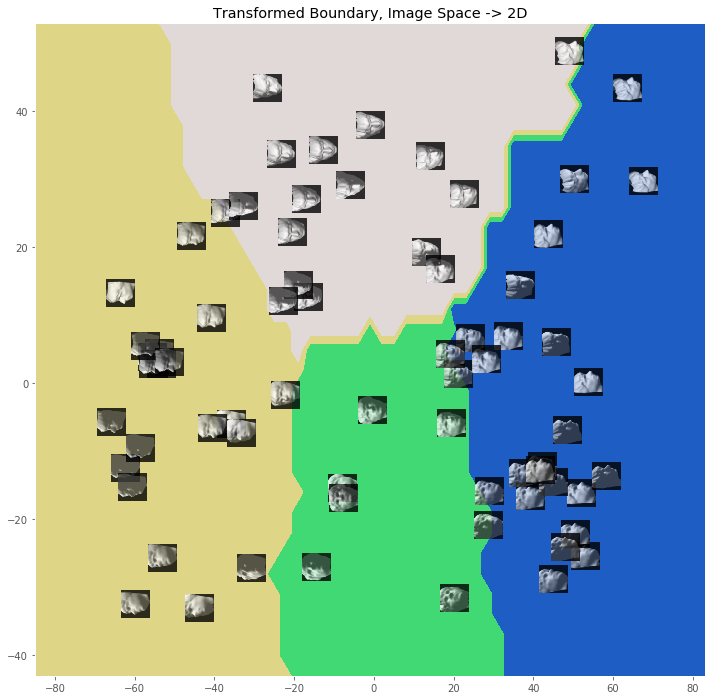

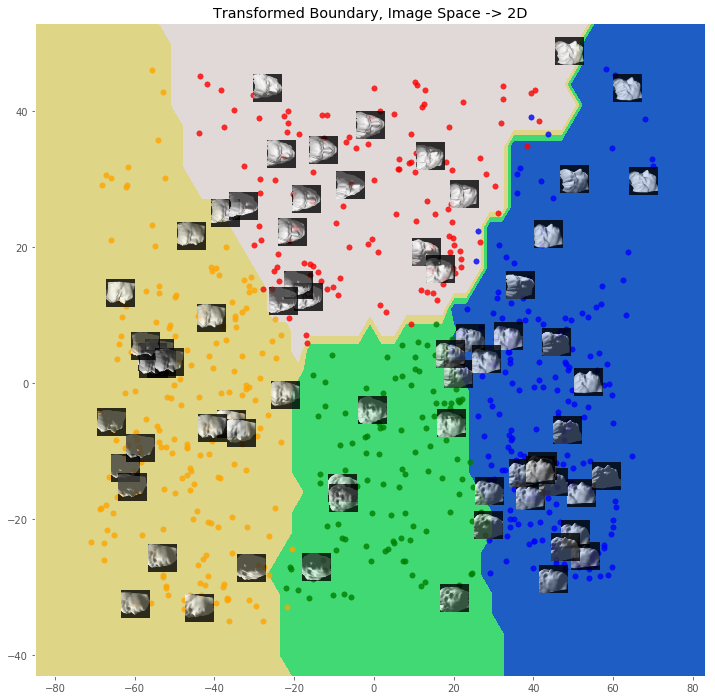

In [40]:
Plot2DBoundary(data_train, label_train, data_test, label_test)